# **`K-Nearest Neighbors`**

In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier as KNC, kneighbors_graph
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

%matplotlib inline

In [2]:
f1_values_set1 = np.random.randint(low=12, high=17,size=50)
f2_values_set1 = np.random.randint(low=20, high=25,size=50)

f1_values_set2 = np.random.randint(low=2, high=7,size=50)
f2_values_set2 = np.random.randint(low=10, high=15,size=50)

In [3]:
dummy_dataset1 = pd.DataFrame({'f1':f1_values_set1,
                           'f2':f2_values_set1})

dummy_dataset2 = pd.DataFrame({'f1':f1_values_set2,
                           'f2':f2_values_set2})

dummy_data = pd.concat([dummy_dataset1,dummy_dataset2],axis=0).reset_index(drop=True)

In [4]:
dummy_data['label'] = dummy_data['f1'].apply(lambda val: 1 if val > 7 else 0)

In [5]:
dummy_data.head()

,f1,f2,label
0,13,24,1
1,12,22,1
2,14,21,1
3,16,23,1
4,13,21,1


<AxesSubplot:xlabel='f1', ylabel='f2'>

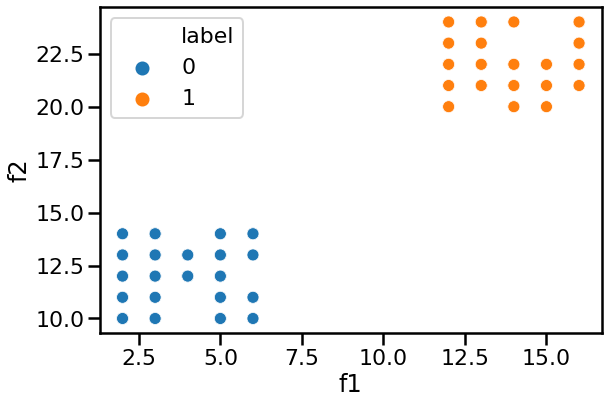

In [6]:
sns.set_context(context='poster')
plt.figure(figsize=(9,6))
sns.scatterplot(x='f1',y='f2',hue='label',data=dummy_data)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(dummy_data.iloc[:,0:-1],dummy_data['label'],test_size=0.40,random_state=42)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60, 2), (40, 2), (60,), (40,))

### **K=1**

In [9]:
knc = KNC(n_neighbors=1)

In [10]:
knc_model = knc.fit(X_train,y_train)

In [11]:
y_predict = knc.predict(X_test)

In [12]:
accuracy_score(y_test,y_predict), precision_score(y_test,y_predict), recall_score(y_test,y_predict)

(1.0, 1.0, 1.0)

### **K=1, Weighted KNN with distance metric as Canberra**

In [13]:
knc2 = KNC(n_neighbors=1, weights='distance',algorithm='ball_tree',metric=scipy.spatial.distance.canberra)

In [14]:
knc_model2 = knc2.fit(X_train,y_train)

In [15]:
y_predict2 = knc_model2.predict(X_test)

In [16]:
accuracy_score(y_test,y_predict2), precision_score(y_test,y_predict2), recall_score(y_test,y_predict2)

(1.0, 1.0, 1.0)

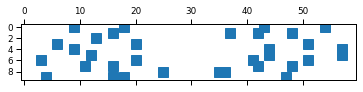

In [17]:
# pd.DataFrame(knc2.kneighbors_graph(X=X_train,n_neighbors=1,mode='connectivity').toarray())
sns.set_context('paper')
plt.spy(knc2.kneighbors_graph(X=X_train.iloc[0:10,],n_neighbors=5,mode='distance'))
plt.show()

### **KNN on Breast Cancer Dataset**

In [18]:
cancer = load_breast_cancer()

In [19]:
cancer_df = pd.concat([pd.DataFrame(cancer.data,columns=cancer.feature_names),pd.DataFrame(cancer.target,columns=['Label'])],axis=1)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


#### **Only TRAIN and TEST**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(cancer_df.iloc[:,0:-1],cancer_df['Label'],test_size=0.40,random_state=22)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((341, 30), (228, 30), (341,), (228,))

In [22]:
def filt(val):
    if val%2 != 0:
        return val

In [23]:
neighbors = list(filter(filt, [val for val in range(0,32)]))
neighbors

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

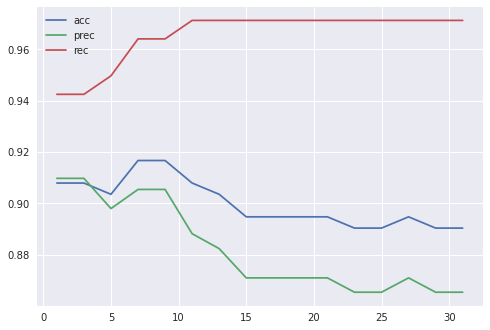

In [24]:
acc_scr = []
rec_scr = []
prec_scr = []

for neighbor in neighbors:
    knn_model = KNC(n_neighbors=neighbor)
    knn_model.fit(X_train, y_train)
    knn_y_predict = knn_model.predict(X_test)
    acc_scr.append(accuracy_score(y_test,knn_y_predict))
    rec_scr.append(recall_score(y_test,knn_y_predict))
    prec_scr.append(precision_score(y_test,knn_y_predict))
    
with plt.style.context('seaborn'):
    sns.lineplot(x=neighbors,y=acc_scr,label='acc')
    sns.lineplot(x=neighbors,y=prec_scr,label='prec')
    sns.lineplot(x=neighbors,y=rec_scr,label='rec')

#### **TRAIN, CV and TEST**

In [25]:
X1, X_test, y1, y_test = train_test_split(cancer_df.iloc[:,0:-1],cancer_df['Label'],test_size=0.30,random_state=42)

In [26]:
X_train, X_cv, y_train, y_cv = train_test_split(X1,y1,test_size=0.30,random_state=42)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_cv.shape, y_cv.shape

((278, 30), (171, 30), (278,), (171,), (120, 30), (120,))

#### **CV performance metrics**

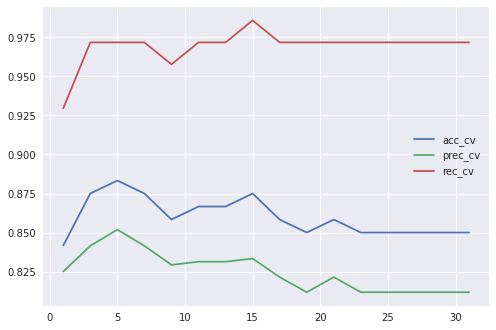

In [28]:
acc_scr_cv = []
rec_scr_cv = []
prec_scr_cv = []

for neighbor in neighbors:
    knn_model = KNC(n_neighbors=neighbor,weights='distance',algorithm='kd_tree',leaf_size=50,p=3)
    knn_model.fit(X_train, y_train)
    y_cv_pred = knn_model.predict(X_cv)
    acc_scr_cv.append(accuracy_score(y_cv,y_cv_pred))
    rec_scr_cv.append(recall_score(y_cv,y_cv_pred))
    prec_scr_cv.append(precision_score(y_cv,y_cv_pred))
    
with plt.style.context('seaborn'):
    sns.lineplot(x=neighbors,y=acc_scr_cv,label='acc_cv')
    sns.lineplot(x=neighbors,y=prec_scr_cv,label='prec_cv')
    sns.lineplot(x=neighbors,y=rec_scr_cv,label='rec_cv')

#### **CV Error**

In [29]:
acc_scr_cv_err = [(1 - val)*10 for val in acc_scr_cv]
prec_scr_cv_err = [(1 - val)*10 for val in prec_scr_cv]
rec_scr_cv_err = [(1 - val)*10 for val in rec_scr_cv]

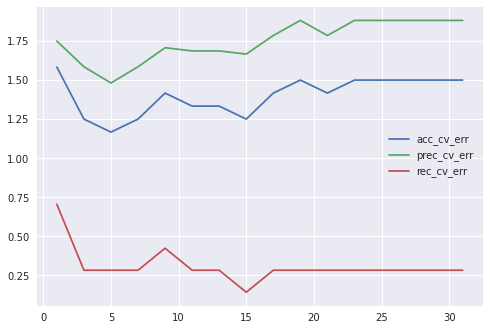

In [30]:
with plt.style.context('seaborn'):
    sns.lineplot(x=neighbors,y=acc_scr_cv_err,label='acc_cv_err')
    sns.lineplot(x=neighbors,y=prec_scr_cv_err,label='prec_cv_err')
    sns.lineplot(x=neighbors,y=rec_scr_cv_err,label='rec_cv_err')

#### **TEST set performance metrics**

In [31]:
knn_cancer_model = KNC(n_neighbors=neighbor,weights='distance',algorithm='kd_tree',leaf_size=50,p=3)
knn_cancer_model.fit(X_train,y_train)
knn_cancer_ypred = knn_cancer_model.predict(X_test)

In [32]:
accuracy_score(y_test,knn_cancer_ypred), precision_score(y_test,knn_cancer_ypred), recall_score(y_test,knn_cancer_ypred)

(0.9415204678362573, 0.9152542372881356, 1.0)

#### **Predicting Class Probability**

In [33]:
knn_cancer_model.predict_proba(X_test)

array([[0.10727533, 0.89272467],
       [1.        , 0.        ],
       [0.90987962, 0.09012038],
       [0.01882241, 0.98117759],
       [0.01403691, 0.98596309],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.96872456, 0.03127544],
       [0.02335353, 0.97664647],
       [0.12278102, 0.87721898],
       [0.03116392, 0.96883608],
       [0.98430656, 0.01569344],
       [0.12262872, 0.87737128],
       [0.57084654, 0.42915346],
       [0.02223204, 0.97776796],
       [1.        , 0.        ],
       [0.11867577, 0.88132423],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.28898917, 0.71101083],
       [0.0501302 , 0.9498698 ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.0243354 , 0.9756646 ],
       [0.02509231, 0.97490769],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.